In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


**Import Libraries**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix

**Reading CSV File**

In [3]:
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

**Data Head**

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Counting Number Of Null Elements**

In [5]:
data.isnull().sum().sum()

569

**Declaring Type In Binary i.e. 0 and 1 **

In [6]:
data['Type'] = 0
col1 = data['diagnosis']
col2 = data['Type']
for i in range(len(data)):
    if(col1[i] == 'M'):
        col2[i] = 1
    elif(col1[i] == 'B'):
        col2[i] = 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


* **Deleting Unnamed 32 and declaring features and target for splitting **

In [7]:
data.drop(['Unnamed: 32'], axis=1, inplace=True)
features = data.drop(columns = ['id','Type', 'diagnosis'])
target = data['Type']

**Splitting Data**

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Converting labels to one-hot-encoding**

In [12]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

Using TensorFlow backend.


**Declaring classifier (Knn) and checking best value for K**

In [13]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.16222142173508441
RMSE value for k=  2 is: 0.14048786894601084
RMSE value for k=  3 is: 0.13245323619993113
RMSE value for k=  4 is: 0.14242573001015602
RMSE value for k=  5 is: 0.13891811402785798
RMSE value for k=  6 is: 0.14559817868358707
RMSE value for k=  7 is: 0.14472461987425897
RMSE value for k=  8 is: 0.14622441430727032
RMSE value for k=  9 is: 0.1518780118149128
RMSE value for k=  10 is: 0.15783623549926945
RMSE value for k=  11 is: 0.16355662464774004
RMSE value for k=  12 is: 0.16184546348458742
RMSE value for k=  13 is: 0.16190112192234674
RMSE value for k=  14 is: 0.15831191243236975
RMSE value for k=  15 is: 0.16161946298750363
RMSE value for k=  16 is: 0.1620100590377697
RMSE value for k=  17 is: 0.1638967266898099
RMSE value for k=  18 is: 0.16568911926236615
RMSE value for k=  19 is: 0.1662896251332911
RMSE value for k=  20 is: 0.16496944652149467


**Best Value of K graph**

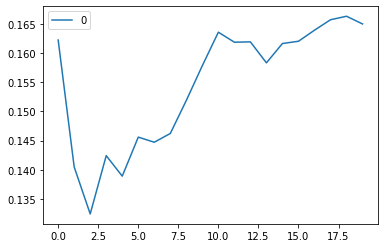

In [14]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

**K Nearest Neighbour Classifier with best value of K (i.e. 3)**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
#    print(name)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9912280701754386
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

   micro avg       0.99      0.99      0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114
 samples avg       0.99      0.99      0.99       114



**Accuracy : 0.99**

Confusion Matrix

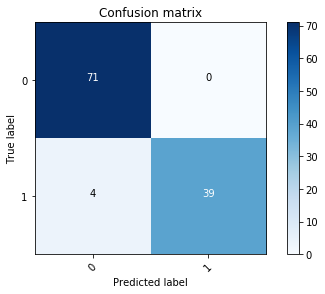

In [25]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2)) 